In [1]:
#https://www.kaggle.com/mishra5001/healthcare-problem-statement
#https://www.kaggle.com/yogeshrampariya/patients-healthcare-stay-classification
#https://www.kaggle.com/tamannasheme/los-risk

In [2]:
import pandas as pd
import numpy as np
from time import time
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import requests
#from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict, RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, classification_report, roc_curve, auc, plot_roc_curve, f1_score, roc_auc_score, balanced_accuracy_score,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from scikitplot.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
import sklearn.metrics as metrics
import shap
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [9]:
import pandas as pd
import numpy as np
import statistics

In [2]:
data_dummies=pd.read_csv('train_data.csv')
data_dummies

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
data_dummies['Stay']

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay, Length: 318438, dtype: object

In [5]:
'''
-------------------------------------------------
for drop         'patientid','case_id' ,'City_Code_Patient' ?? ,'City_Code_Hospital' ??,'Ward_Type'	??
-------------------------------------------------
for dummies     'Hospital_type_code'
                'Hospital_region_code'
                'Department'	
                	
                'Ward_Facility_Code'
                'Type of Admission'	
                'Severity of Illness'
----------------------------------------------------
label            'age','stay'
----------------------------------------------------
?                'Hospital_code'
-----------------------------------------------------
'''

"\n-------------------------------------------------\nfor drop         'patientid','case_id' ,'City_Code_Patient' ?? ,'City_Code_Hospital' ??,'Ward_Type'\t??\n-------------------------------------------------\nfor dummies     'Hospital_type_code'\n                'Hospital_region_code'\n                'Department'\t\n                \t\n                'Ward_Facility_Code'\n                'Type of Admission'\t\n                'Severity of Illness'\n----------------------------------------------------\nlabel            'age','stay'\n----------------------------------------------------\n?                'Hospital_code'\n-----------------------------------------------------\n"

In [6]:
stay_dict = {'0-10': 0, '11-20': 0, '21-30': 1, '31-40': 1, '41-50': 1, '51-60': 1, '61-70': 1, '71-80': 1, '81-90': 1, '91-100': 1, 'More than 100 Days': 1}
data_dummies['Stay'] = data_dummies['Stay'].map(stay_dict)
data_dummies['Stay'] = data_dummies['Stay'].astype('int64')

In [10]:
data_dummies['Bed Grade'].fillna(statistics.median(data_dummies['Bed Grade']),inplace=True)
data_dummies['City_Code_Patient'].fillna(statistics.mode(data_dummies['City_Code_Patient']),inplace=True)

In [11]:
data_dummies["Hospital_code"] = data_dummies["Hospital_code"].astype("category")
data_dummies["City_Code_Hospital"] = data_dummies["City_Code_Hospital"].astype("category")
data_dummies["City_Code_Patient"] = data_dummies["City_Code_Patient"].astype("category")

In [12]:
data_dummies = data_dummies.drop(['patientid','case_id'], axis = 1)  # 'City_Code_Hospital','City_Code_Patient','Hospital_code'

In [13]:
data_dummies=pd.get_dummies(data_dummies)

In [14]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Columns: 128 entries, Available Extra Rooms in Hospital to Age_91-100
dtypes: float64(2), int64(3), uint8(123)
memory usage: 49.5 MB


In [15]:
data_dummies.head()

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,Hospital_code_1,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,3,2.0,2,4911.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2.0,2,5954.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.0,2,4745.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,2.0,2,7272.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,2.0,2,5558.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
data_dummies.isnull().sum().sum()

0

In [17]:
data_dummies_small=data_dummies.copy()                 #.sample(n=500)
data_dummies_small

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,Hospital_code_1,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,3,2.0,2,4911.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2.0,2,5954.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.0,2,4745.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,2.0,2,7272.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,2.0,2,5558.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,3,4.0,3,4144.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
318434,2,4.0,4,6699.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
318435,3,4.0,3,4235.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
318436,3,3.0,5,3761.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
data_dummies.to_csv('healthcare_pycaret.csv', index=False)  

In [16]:
'''
X_dummies= data_dummies.drop(['Stay'], axis=1)
y_dummies= data_dummies['Stay']


# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X = DataFrame(X)

'''

"\nX_dummies= data_dummies.drop(['Stay'], axis=1)\ny_dummies= data_dummies['Stay']\n"

In [17]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    train = Dataframe.copy()
    
    X = train.drop(['Stay'], axis=1)
    y = train['Stay']
    
    #scaling
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(X)
    x_scaled=pd.DataFrame(x_scaled)
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    print(f'StratifiedKFold and sf is: {sf}')
    print(sf.split(x_train, y_train))

    for train_index, test_index in sf.split(x_train, y_train):
#         print(train_index)
#         print(test_index)
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    print(f'our RandomizedSearchCV :rand_model is:{rand_model}')
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
        print(best_model)

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    print(f'final model with best estimator is :{final_model_sm}')
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(sf_x_test)

    #confusion matrix
    cf_matrix = confusion_matrix(sf_y_test , prediction)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    #classification_report
    print(classification_report(sf_y_test , prediction,target_names=['class 0:20 days', 'class 20:above days']))
    
    #create ROC curve
    fpr, tpr, _ = metrics.roc_curve(sf_y_test , prediction)
    auc = metrics.roc_auc_score(sf_y_test , prediction)

    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.title('ROC Plot')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    
    
    Model = {}

    Model['Algorithm'] = Modelname
    Model['Model Score'] = str(round((accuracy_score(sf_y_test , prediction)*100),2)) + "%"
    Model['Precision'] = round(precision_score(sf_y_test , prediction),2)
    Model['Recall'] = round(recall_score(sf_y_test , prediction),2)
    Model['F1 score'] = round(f1_score(sf_y_test , prediction),2)
    Model['ROC-AUC score'] = round(roc_auc_score(sf_y_test , prediction),2)
    print(Model)
    return Model


In [18]:
# Number of trees in random forest
n_estimators = [200,500]  #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']  #'sqrt'
# Maximum number of levels in tree
max_depth = [10,20,30]   #int(x) for x in np.linspace(10, 110, num = 11)
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]  #10
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]  #4
# Method of selecting samples for training each tree
bootstrap = [True,False] #True
# Create the random grid
model_parameter_sm  = {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

RandomForest
StratifiedKFold and sf is: StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x000001C088E36A50>
our RandomizedSearchCV :rand_model is:RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 500]})
RandomForestClassifier(max_depth=20, n_estimators=500)
RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=500)
RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=10,
                       n_estimators=200)
RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
  

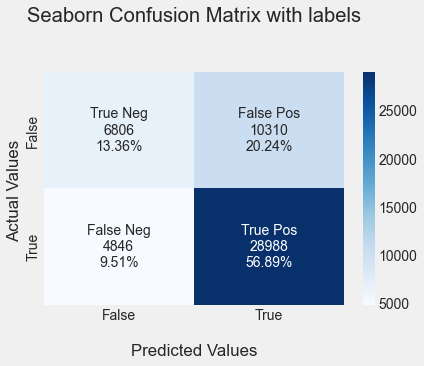

                     precision    recall  f1-score   support

    class 0:20 days       0.58      0.40      0.47     17116
class 20:above days       0.74      0.86      0.79     33834

           accuracy                           0.70     50950
          macro avg       0.66      0.63      0.63     50950
       weighted avg       0.69      0.70      0.69     50950



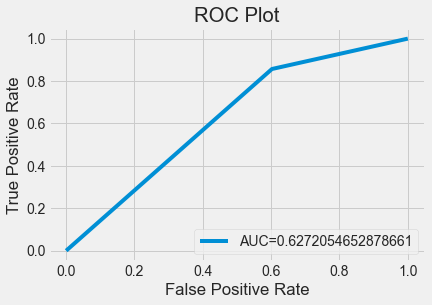

{'Algorithm': 'RandomForest', 'Model Score': '70.25%', 'Precision': 0.74, 'Recall': 0.86, 'F1 score': 0.79, 'ROC-AUC score': 0.63}


In [19]:
print("RandomForest")
TrainedModel = taining_without_feature_selection(model_parameter_sm, 
                                                 RandomForestClassifier(), 
                                                 data_dummies_small,
                                                 "RandomForest")
#Models = Models.append(TrainedModel,ignore_index=True)

In [21]:
'''
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    train = Dataframe.copy()
    
    X = train.drop(['case_id','Stay'], axis=1)
    y = train['Stay']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    print(sf)
    print(sf.split(x_train, y_train))

    for train_index, test_index in sf.split(x_train, y_train):
#         print(train_index)
#         print(test_index)
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    print(rand_model)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
        print(best_model)

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    print(final_model_sm)
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model
'''

'\nModels = pd.DataFrame(columns=[\'Algorithm\',\'Model Score\',\'Precision\',\'Recall\',\'F1 score\',\'ROC-AUC score\'])\n\ndef taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):\n    \n    train = Dataframe.copy()\n    \n    X = train.drop([\'case_id\',\'Stay\'], axis=1)\n    y = train[\'Stay\']\n    \n    #Traditional split of the dataset 80% - 20%\n    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values\n\n    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]\n    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)\n    print(sf)\n    print(sf.split(x_train, y_train))\n\n    for train_index, test_index in sf.split(x_train, y_train):\n#         print(train_index)\n#         print(test_index)\n        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index

In [22]:
'''
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    train = Dataframe.copy()
    
    X = train.drop(['case_id','Stay'], axis=1)
    y = train['Stay']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
    print(sf)
    print(sf.split(x_train, y_train))

    for train_index, test_index in sf.split(x_train, y_train):
#         print(train_index)
#         print(test_index)
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
    print(rand_model)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_
        print(best_model)

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    print(final_model_sm)
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model
'''

'\nModels = pd.DataFrame(columns=[\'Algorithm\',\'Model Score\',\'Precision\',\'Recall\',\'F1 score\',\'ROC-AUC score\'])\n\ndef taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):\n    \n    train = Dataframe.copy()\n    \n    X = train.drop([\'case_id\',\'Stay\'], axis=1)\n    y = train[\'Stay\']\n    \n    #Traditional split of the dataset 80% - 20%\n    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n    \n    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values\n\n    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]\n    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)\n    print(sf)\n    print(sf.split(x_train, y_train))\n\n    for train_index, test_index in sf.split(x_train, y_train):\n#         print(train_index)\n#         print(test_index)\n        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index